In [1]:
'start'

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
4,application_1646643269786_0006,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

'start'

In [58]:
sc.install_pypi_package("pandas==0.25.1")
sc.install_pypi_package("matplotlib==3.1.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…



You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

You are using pip version 9.0.1, however version 22.0.4 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:
df = spark.read.text('s3a://commoncrawl/crawl-001/2009/01/01/0/*.gz')
df.limit(5).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+
|               value|
+--------------------+
|filedesc://123088...|
|     1 0 CommonCrawl|
|URL IP-address Ar...|
|                    |
|http://www.cropde...|
+--------------------+

In [3]:
import pyspark.sql.functions as f

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1498433168

In [6]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- value: string (nullable = true)

In [22]:
print(df.rdd.take(50))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[Row(value='filedesc://1230881200347_0.arc.gz 0.0.0.0 20090101232640 text/plain 73'), Row(value='1 0 CommonCrawl'), Row(value='URL IP-address Archive-date Content-type Archive-length'), Row(value=''), Row(value='http://www.cropdesign.com.sg/shikisai/shoes.htm 203.211.133.161 20081204112029 text/html 5480'), Row(value='HTTP/1.1 200 OK'), Row(value='Date:Thu, 04 Dec 2008 19:20:35 GMT'), Row(value='Server:Apache/2.2.8 (FreeBSD) mod_ssl/2.2.8 OpenSSL/0.9.8e DAV/2'), Row(value='Last-Modified:Sun, 20 Jul 2008 16:32:56 GMT'), Row(value='ETag:"363312f-130b-4527724a19e00"'), Row(value='Accept-Ranges:bytes'), Row(value='Content-Length:4875'), Row(value='Connection:close'), Row(value='Content-Type:text/html'), Row(value='x_commoncrawl_ParseSegmentId:5268'), Row(value='x_commoncrawl_OriginalURL:http://www.cropdesign.com.sg/shikisai/shoes.htm'), Row(value='x_commoncrawl_URLFP:5154776448893522226'), Row(value='x_commoncrawl_HostFP:8630421867771573121'), Row(value='x_commoncrawl_Signature:cff4eb65616

In [ ]:
(df
 .rdd
 .map(lambda x: x)
 .take(50)
)

In [29]:
df_sample = spark.read.text('s3a://commoncrawl/crawl-001/2009/01/01/0/1230878280716_0.arc.gz')
df_sample.limit(100).show(100, truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|value                                                                                                                                                                                                                                                                                                 |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|filedesc://1230878280716_0.arc.gz 0.0.0.0 20090101223800 text/plain 73                                      

In [35]:
df_sample.filter(f.col('value').startswith('http')).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

14740

## 3b: total number of crawled URLs

In [62]:
df.filter(f.col('value').startswith('x_commoncrawl_OriginalURL:http')).limit(5).show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------------------------------------------------------------------------------+
|value                                                                                                    |
+---------------------------------------------------------------------------------------------------------+
|x_commoncrawl_OriginalURL:http://www.cropdesign.com.sg/shikisai/shoes.htm                                |
|x_commoncrawl_OriginalURL:http://www.dnp-orikomio.com/entry/index2.html                                  |
|x_commoncrawl_OriginalURL:http://www.wyomingbioinformatics.org/%7Eachurban/html/WashingtonVisit/part2.htm|
|x_commoncrawl_OriginalURL:http://www.cluedupmarketing.com/us/contactus.asp                               |
|x_commoncrawl_OriginalURL:http://www.didntyouhear.com/2006/11/30/giant-chocolate-eggs-are-wasteful/      |
+---------------------------------------------------------------------------------------------------------+

In [60]:
df.filter(f.col('value').startswith('x_commoncrawl_OriginalURL:http')).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2967656

**3b answer:** <u>2967656</u> URLs crawled

# 3c Plot # of crawled URLs per hour

In [53]:
df_timestamp = (df.
                filter(f.col('value').startswith('x_commoncrawl_FetchTimestamp')).
                withColumn('unix', (f.substring('value', 30, 13).cast('double') / 1000)).
                withColumn('timestamp', f.from_unixtime(f.col('unix'))).
                withColumn('hour', f.hour(f.col('timestamp'))))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [57]:
df_timestamp.limit(5).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+-------------------+----+
|               value|            unix|          timestamp|hour|
+--------------------+----------------+-------------------+----+
|x_commoncrawl_Fet...|1.228345171543E9|2008-12-03 22:59:31|  22|
|x_commoncrawl_Fet...|1.228345171551E9|2008-12-03 22:59:31|  22|
|x_commoncrawl_Fet...|1.228345171558E9|2008-12-03 22:59:31|  22|
|x_commoncrawl_Fet...|1.228345171565E9|2008-12-03 22:59:31|  22|
|x_commoncrawl_Fet...|1.228345171582E9|2008-12-03 22:59:31|  22|
+--------------------+----------------+-------------------+----+

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

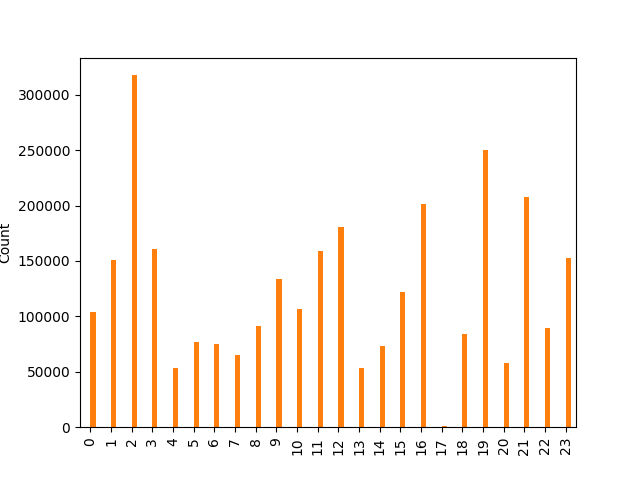

In [71]:
(df_timestamp
 .select('hour')
 .groupBy('hour')
 .count()
 .orderBy('hour')
#  .limit(5)
 .toPandas().plot(kind='bar', legend=None))
# plt.legend(False)
plt.ylabel('Count')
%matplot plt